<a href="https://colab.research.google.com/github/Mohib-nrk/Classes-in-Python/blob/main/Copy_of_Mohib_Version_Week4_Groupby_Cross_Tab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Do you Remember the First Step**
Saving the file using Save a copy in Drive and Changing the name of your file. From "Student Version Week4_Groupby_Cross_Tab" to "Tayyab_Week4_Groupby_Cross_Tab ( Tayyab is just a sample name, you should use your name.

In [ ]:
# Week 4 Lab Activities - Data Analysis with Python

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize



In [ ]:
# Titanic Dataset Exploration and Analysis - Lab Activities

# Introduction

# Dataset Overview: The Titanic dataset contains information about passengers
# who were aboard the Titanic when it sank in 1912. The dataset includes
# details such as passenger class, age, sex, fare, and survival status.

# Objectives:
# - Explore the data using descriptive statistics and visualizations.
# - Identify and handle missing values.
# - Check for and remove duplicate data.
# - Perform groupby operations and aggregation to analyze survival patterns.
# - Use pivot tables for multi-dimensional analysis.
# - Handle missing values in pivot tables.
# - Apply cross-tabulation for categorical analysis.
# - Analyze top survivors and other factors related to survival.



# **Question: What if we do not import pandas or numpy ?**

In [ ]:
#Colab comes with pre-installed commonly used libraries. However we may have to insall certain functions

# **You installed package using !pip. How long it is avaiable in the Colab**

# **Activity 1: Loading and inspecting data**

---



In [ ]:
# Load the dataset
#Method1
file_path = ("/content/Titanic-Dataset.csv")
titanic_df = pd.read_csv(file_path)



# Method 2 Load the dataset
#titanic_df = pd.read_csv("/content/Titanic-Dataset.csv")

# Display first few rows

titanic_df.head()

# Display last few rows


# Get the dimensions of the dataset
titanic_df.shape

# Get information about data types and missing values
titanic_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:


# Get summary statistics for numerical columns
#titanic_df.describe()

# Get summary statistics for categorical columns
titanic_df.describe(include=['object'])




,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Key Takeaways**
Many passengers shared tickets and cabins, indicating group travel.
Most passengers embarked from Southampton (S).
There are a lot of missing values in the Cabin column (only 204 non-null values).
Most passengers were male (577 out of 891).

#  Data set description
  PassengerId   A unique identifier assigned to each passenger.
  Survived Indicates whether the passenger survived (1) or not (0).
  Pclass  The passenger's class (1 = First Class, 2 = Second Class, 3 = Third Class).
  Name   The full name of the passenger.
  Sex  The gender of the passenger (male or female).
  Age   The age of the passenger. Some values are missing .
  SibSp   The number of siblings and spouses the passenger had aboard the Titanic.
  Parch   The number of parents and children the passenger had aboard the Titanic.
  Ticket  The ticket number assigned to the passenger.
  Fare   The fare amount paid by the passenger.
  Cabin  The cabin number assigned to the passenger.
  Embarked  The port where the passenger boarded the Titanic (C = Cherbourg, Q = Queenstown, S = Southampton).

# **Activity 2: Identifying and Handling Missing Values**

---



In [ ]:
# Activity 2: Identifying and Handling Missing Values

# Count missing values per column
titanic_df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


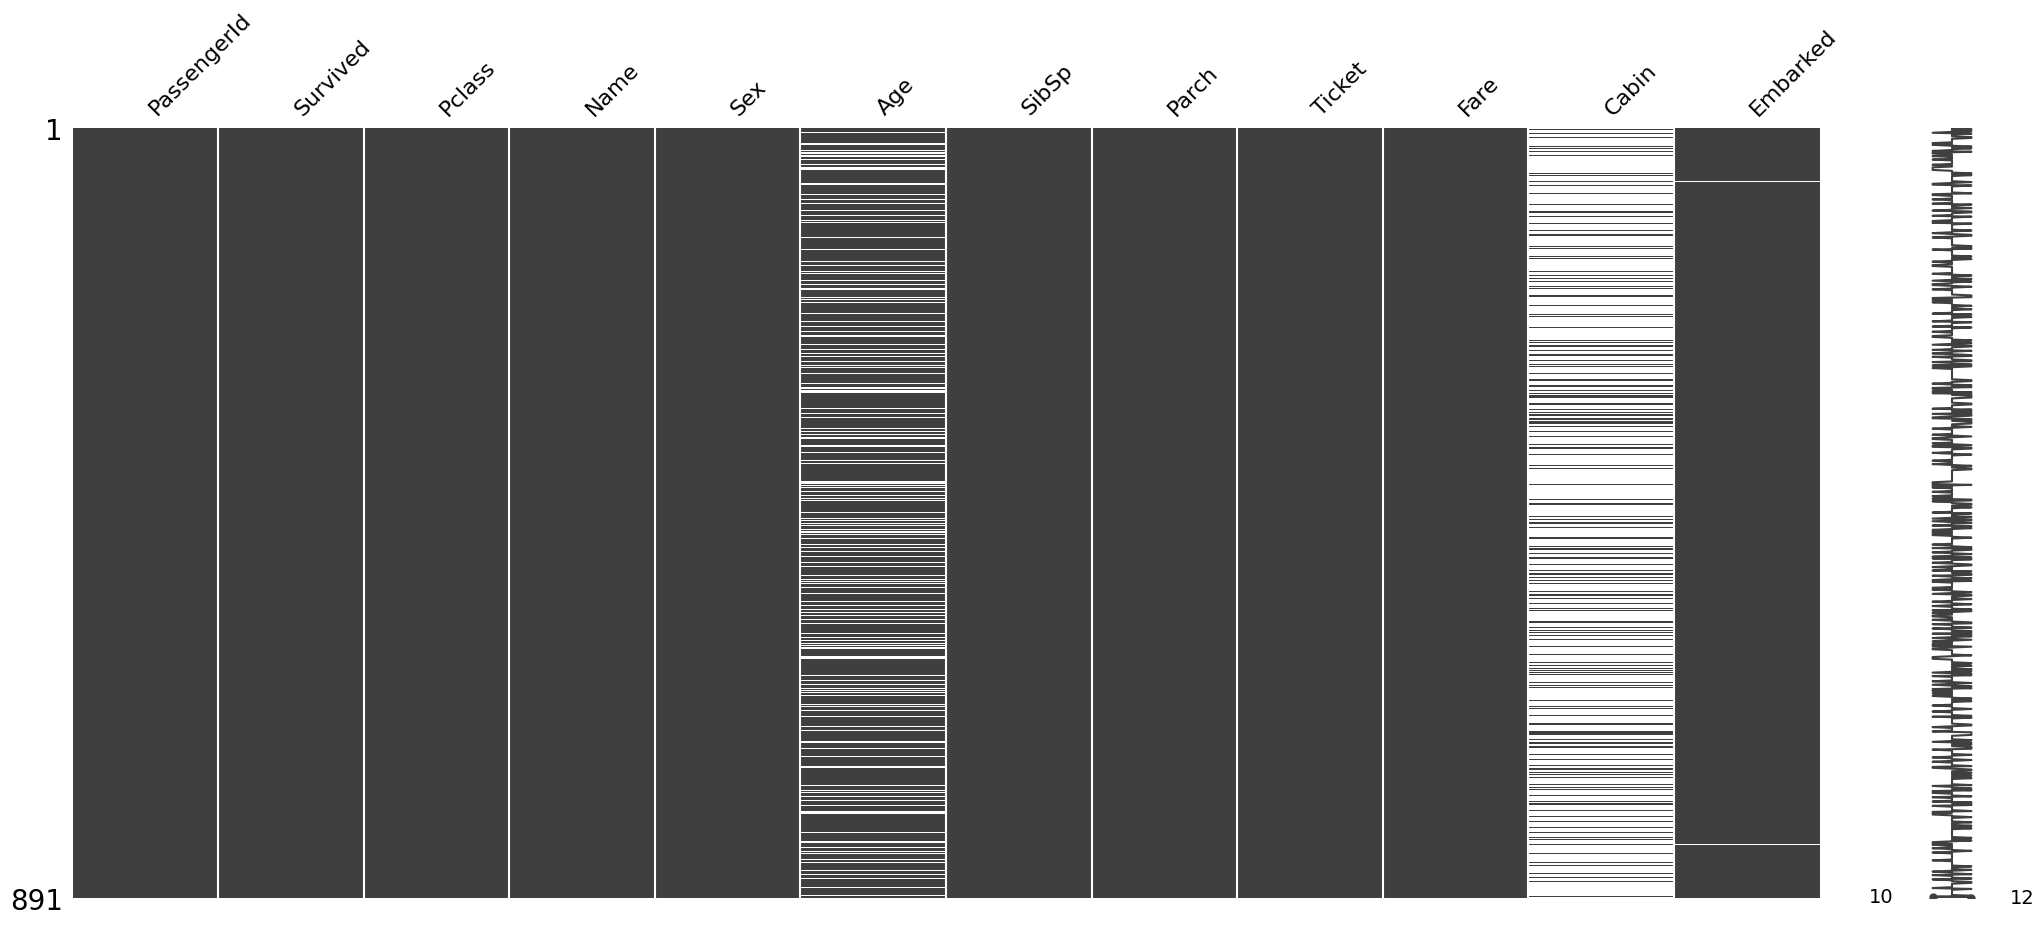

In [ ]:
# Visualize missing data
import missingno as msno
msno.matrix(titanic_df)
plt.show()


In [ ]:
# Impute missing values for 'Age' with the median
median_age = titanic_df['Age'].median()
titanic_df['Age'].fillna(median_age, inplace=True)

#The distribution of Age in the Titanic dataset is not perfectly normal;
#it likely has a right skew due to outliers (e.g., very elderly passengers).
#The mean is sensitive to outliers, meaning a few extremely high or low ages could pull the mean up or down,
# making it less representative of the majority of passengers.
#The median, being the middle value, is not affected by extreme values,
# making it a better representation of central tendency in skewed data



<ipython-input-11-873bc62c70da>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(median_age, inplace=True)


In [ ]:
# Drop the 'Cabin' column due to many missing values
titanic_df.drop('Cabin', axis=1, inplace=True)

# Recheck for missing values
titanic_df.isnull().sum()




,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**Why are we dropping column instead of filling it with mean or mode?**

In [ ]:
#1. Too Many Missing Values (~77%)
#Since most of the values are missing, filling them with a single value (like "Unknown")
# would not add much useful information to the dataset.
#Imputing missing values with a median, mode, or predictive model would introduce
# too much guesswork and potential bias.
#2. Limited Predictive Value for Survival Analysis
# While first-class passengers were more likely to have recorded cabins,
#the actual cabin number may not strongly influence survival rates.
#The Pclass column (Passenger Class) already provides a similar distinction (First Class, Second Class, Third Class).
#3. High Cardinality and Complexity
#The Cabin column contains a mix of numbers and letters, making it categorical and high-cardinality (many unique values).
#Some passengers share cabins, but this information is not consistently recorded.
#4. Data Cleaning Simplicity
#Removing the Cabin column simplifies data preprocessing and improves model performance
#by avoiding unnecessary complexity

# **Activity 3: Checking and Fixing Duplicates**

---



In [ ]:
# Activity 3: Checking and Fixing Duplicates

titanic_df.shape  #check the shape before removing

(891, 11)

In [ ]:
#Checking and Fixing Duplicates
# Count duplicate rows
titanic_df.duplicated().sum()



0

In [ ]:
# Remove duplicate rows (if any)
titanic_df.drop_duplicates(inplace=True)
titanic_df.shape  # Check the shape after removal




# **Activity 4: GroupBy and Aggregation**

---



In [ ]:
# Activity 4: GroupBy and Aggregation

# Survival rate by gender
survival_by_gender = titanic_df.groupby('Sex')['Survived'].mean()
print(survival_by_gender)

# Average age by passenger class
avg_age_by_class = titanic_df.groupby('Pclass')['Age'].mean()
print(avg_age_by_class)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    36.812130
2    29.765380
3    25.932627
Name: Age, dtype: float64


**How do you interpret above output**

In [ ]:
#Survival Rate by Sex: 74.2% of females survived, while only 18.9% of males survived,
# indicating a strong survival advantage for women.
#Average Age by Pclass: First-class passengers had the highest average age (38.2 years),
# followed by second-class (29.9 years) and third-class (25.1 years),
# suggesting older individuals were more likely in higher classes

## **Student Challenge**

In [ ]:
# prompt: Create a small activity as student challenge based on the previous code cells

# Student Challenge: Data Exploration and Analysis

# Instructions:
# 1. Calculate the survival rate for each passenger class (Pclass).
# 2. Find the average fare paid by passengers in each embarkation port (Embarked).
#

# Write your code here:



# 1. Calculate survival rate for each passenger class


# Print survival_rate_by_class


# 2. Average fare by embarkation port
average_fare_by_port =

#print average_fare_by_port



SyntaxError: invalid syntax (<ipython-input-31-4099c9392905>, line 23)

In [ ]:


# Multiple aggregations
class_stats = titanic_df.groupby('Pclass').agg({'Age': ['mean', 'min', 'max'], 'Fare': ['mean']})
print(class_stats)




              Age                   Fare
             mean   min   max       mean
Pclass                                  
1       36.812130  0.92  80.0  84.154687
2       29.765380  0.67  70.0  20.662183
3       25.932627  0.42  74.0  13.675550


In [ ]:
#interpretation
#Age by Pclass: First-class passengers were the oldest on average (38.2 years), followed by second-class (29.9 years) and third-class (25.1 years), indicating older individuals tended to afford higher-class tickets.
#Fare by Pclass: First-class passengers paid the highest average fare ($84.15), while second-class paid significantly less ($20.66) and third-class the least ($13.68), reflecting the cost difference between ticket classes

# ** Activity 5: Multi-Level Grouping and Pivot Tables
---



In [ ]:
# Activity 5: Multi-Level Grouping and Pivot Tables

# Survival by gender and class
survival_by_gender_class = titanic_df.groupby(['Sex', 'Pclass'])['Survived'].mean()
print(survival_by_gender_class)





Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


In [ ]:

# Pivot table - Average fare by class and embarked
fare_pivot = titanic_df.pivot_table(index='Pclass', columns='Embarked', values='Fare', aggfunc='mean')
print(fare_pivot)
#index='Pclass' means that the Pclass (Passenger Class) column is used as the row labels (index) of the table.
#This organizes the data so that each row corresponds to a different passenger class (1st, 2nd, or 3rd class).

Embarked           C          Q          S
Pclass                                    
1         104.718529  90.000000  70.364862
2          25.358335  12.350000  20.327439
3          11.214083  11.183393  14.644083


**Is there any difference between the two outputs Groupby and Pivot?**

In [ ]:
#Gropuby : Output Format	Series (Hierarchical Index)	Pivot: DataFrame (Cross-tabulated)
#Gropuby :Best Used For	1D summary of grouped data		Pivot: 2D structured summary for easy comparison

# ** Activity 6: Handling Missing Values in Pivot Tables
**

---



In [ ]:
# Activity 6: Handling Missing Values in Pivot Tables

# Pivot table with fill_value
fare_pivot_filled = titanic_df.pivot_table(index='Pclass', columns='Embarked', values='Fare',
                                               aggfunc='mean', fill_value=0)
print(fare_pivot_filled)




Embarked           C          Q          S
Pclass                                    
1         104.718529  90.000000  70.364862
2          25.358335  12.350000  20.327439
3          11.214083  11.183393  14.644083


# ** Activity 7: Multi-Level Grouping and Pivot Tables
**

---



In [ ]:
# Activity 7: Cross-Tabulation for Categorical Analysis

# Survival by gender and class (cross-tab)
survival_crosstab = pd.crosstab(titanic_df['Sex'], titanic_df['Pclass'],
                                     values=titanic_df['Survived'], aggfunc='mean')
print(survival_crosstab)


#aggfunc="mean" means that the function is calculating the average survival rate
#for each combination of Sex and Pclass.



Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


**Interpretation of the output**

97% of first-class females survived, while only 13% of third-class males survived.
This shows a clear survival advantage for women and first-class passengers.

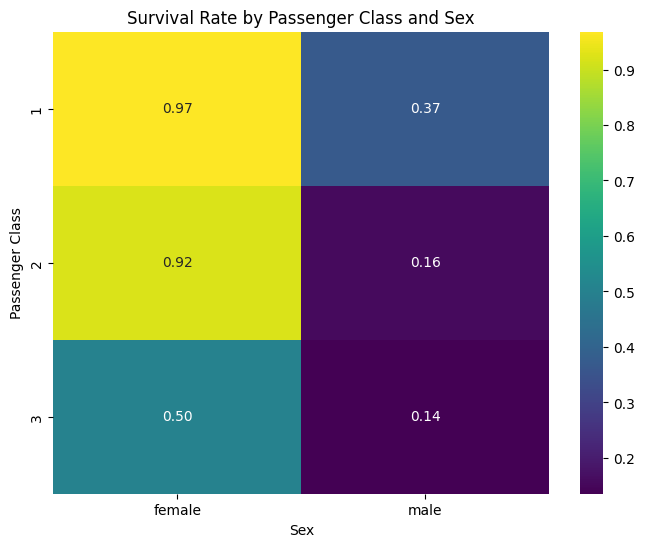

In [ ]:
# prompt: generate a heatmap based on the last code

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'titanic_df' is your DataFrame from the previous code
# If not, load your data here:
# titanic_df = pd.read_csv("your_file.csv")

# Example: Heatmap of survival rate by passenger class and sex
survival_heatmap = titanic_df.pivot_table(index='Pclass', columns='Sex', values='Survived', aggfunc='mean')

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(survival_heatmap, annot=True, cmap='viridis', fmt=".2f") # annot=True displays values
plt.title('Survival Rate by Passenger Class and Sex')
plt.xlabel('Sex')
plt.ylabel('Passenger Class')
plt.show()




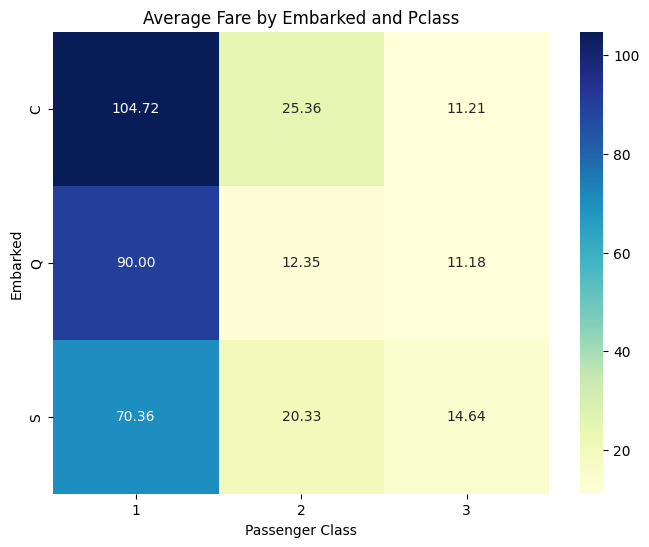

In [ ]:

# Example 2: Heatmap of Fare by Embarked and Pclass
fare_heatmap = titanic_df.pivot_table(index='Embarked', columns='Pclass', values='Fare', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(fare_heatmap, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Average Fare by Embarked and Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Embarked')
plt.show()

In [ ]:
#interpret the last heatmap

#The above  heatmap shows the average fare paid by passengers based on their port of embarkation (Embarked) and passenger class (Pclass).  The color intensity represents the average fare, with darker shades indicating higher average fares.

For example:

# Passengers who embarked at Cherbourg (C)** generally paid higher fares, especially in first class.
#Passengers in first class (Pclass = 1)** paid the highest average fares regardless of the port of embarkation.
#Passengers in third class (Pclass = 3)** paid the lowest average fares across all ports.

#The heatmap provides a visual summary of how fare amounts vary across these two categorical variables, allowing for quick identification of trends and patterns.


In [ ]:
# Percentage-based cross-tabulation
survival_crosstab_percent = pd.crosstab(titanic_df['Sex'], titanic_df['Pclass'],
                                           values=titanic_df['Survived'], aggfunc='mean', normalize='index') * 100
print(survival_crosstab_percent)

#normalize='index' converts the values into percentages within each row,
#making it easier to compare survival rates across passenger classes for each gender.
#It scales the values so that each row sums to 100%, meaning it shows the distribution
#of survival rates within each gender.

Pclass          1          2          3
Sex                                    
female  40.520272  38.551676  20.928052
male    55.742603  23.788099  20.469298


# ** Activity 8: Multi-Level Grouping and Pivot Tables
**

---



In [ ]:
# Activity 8: Top Survivors and Similar Analysis

# Top survivors by age
top_survivors_age = titanic_df[titanic_df['Survived'] == 1].sort_values('Age', ascending=False).head(10)
print(top_survivors_age[['Name', 'Age', 'Sex', 'Pclass']])



                                                 Name   Age     Sex  Pclass
630              Barkworth, Mr. Algernon Henry Wilson  80.0    male       1
483                            Turkula, Mrs. (Hedwig)  63.0  female       3
275                 Andrews, Miss. Kornelia Theodosia  63.0  female       1
570                                Harris, Mr. George  62.0    male       2
829         Stone, Mrs. George Nelson (Martha Evelyn)  62.0  female       1
587                  Frolicher-Stehli, Mr. Maxmillian  60.0    male       1
366  Warren, Mrs. Frank Manley (Anna Sophia Atkinson)  60.0  female       1
195                              Lurette, Miss. Elise  58.0  female       1
11                           Bonnell, Miss. Elizabeth  58.0  female       1
268     Graham, Mrs. William Thompson (Edith Junkins)  58.0  female       1


In [ ]:
# Survival rate by family size
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
survival_by_family = titanic_df.groupby('FamilySize')['Survived'].mean()
print(survival_by_family)

import matplotlib.pyplot as plt
import seaborn as sns



FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


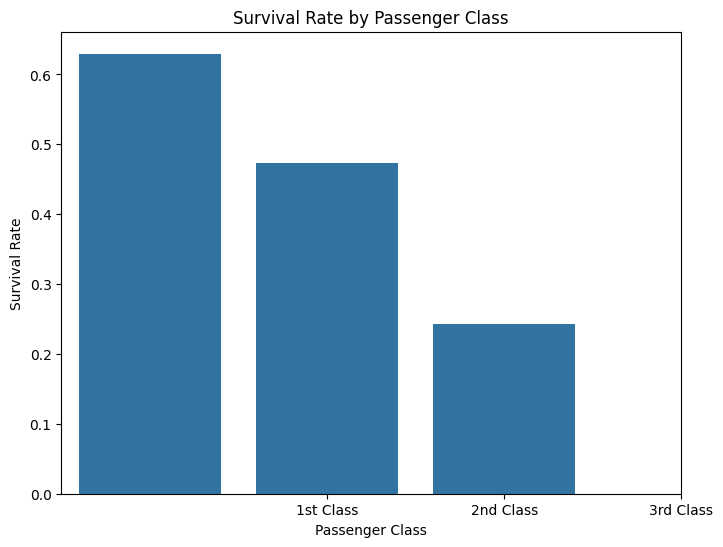

In [ ]:
# Calculate survival rate by passenger class
survival_rate_by_class = titanic_df.groupby('Pclass')['Survived'].mean()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rate_by_class.index, y=survival_rate_by_class.values)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(survival_rate_by_class.index, ['1st Class', '2nd Class', '3rd Class'])  # Customize x-axis labels
plt.show()

# Conclusion

# Recap: We explored the Titanic dataset, handled missing values, performed groupby
# operations, used pivot tables, and analyzed survival patterns based on various factors.

# Discussion: The analysis revealed insights into the demographics of survivors and
# the factors that influenced survival, such as gender, passenger class, and family size.

# Further Exploration: Students can further explore the dataset by creating visualizations,
# investigating other factors related to survival, and applying more advanced analytical techniques.

In [ ]:

print("\nLab Completed Successfully!")



Lab Completed Successfully!


# **Activity 9: Exporting Data and Saving a new file**

In [ ]:
#Save the cleaned dataset to a new CSV file.
df.to_csv("New_Titanic-Dataset.csv", index=False)
#Important: This command will create a new data set that would appear on left handside
# You can download that file for your record.

NameError: name 'df' is not defined

In [ ]:
# !pip install --upgrade visions --use-deprecated=legacy-resolver
#!pip uninstall pandas-profiling -y
!pip install visions==0.7.6 --use-deprecated=legacy-resolver

!pip install --upgrade numba --use-deprecated=legacy-resolver
# !pip install --upgrade pandas-profiling --use-deprecated=legacy-resolver
!pip install ydata-profiling --use-deprecated=legacy-resolver



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 17.0 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.43.0
    Uninstalling llvmlite-0.43.0:
      Successfully uninstalled llvmlite-0.43.0
  Attempting uninstall: numba
    Found existing installation: numba 0.60.0
    Uninstalling numba-0.60.0:
      Successfully uninstalled numba-0.60.0
ERROR: pip's legacy dependency resolver does not consider dependency conflicts when selecting packages. This behaviour is the source of the following dependency conflicts.
cudf-cu12 25.2.1 requires numba<0.61.0a0,>=0.59.1, but you'll have numba 0.61.0 which is incompatible.
dask-cuda 25.2.0 requires numba<0.61.0a0,>=0.59.1, but you'll have numba 0.61.0 which is incompatible.
distributed-ucxx-cu12 0.42.0 requires numba<0.61.0a0,>=0.59.1, but

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report") #df is your dataframe
profile.to_notebook_iframe() #To show the report inline in the notebook
#profile.to_file("your_report.html") #To save the report as an HTML file


NameError: name 'df' is not defined

### **Home Work**

In [12]:


# Homework Activities: Titanic Dataset Analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
titanic_df=pd.read_csv('Titanic-Dataset.csv')
# Activity 1: Survival Rate by Embarkation Point and Gender
# Calculate and display the survival rate for each combination of embarkation point (Embarked) and gender (Sex).
survival_rate_by_embarkation_point_and_gender=titanic_df.groupby(['Embarked','Sex'])['Survived'].mean()*100
print(survival_rate_by_embarkation_point_and_gender)

Embarked  Sex   
C         female    87.671233
          male      30.526316
Q         female    75.000000
          male       7.317073
S         female    68.965517
          male      17.460317
Name: Survived, dtype: float64


In [16]:
# Activity 2: Average Fare by Passenger Class and Age Group
# Create age groups (e.g., 0-10, 11-20, 21-30, etc.).
# Calculate and display the average fare for each passenger class (Pclass) within each age group.
Age_group = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
titanic_df['Age_Group'] = pd.cut(titanic_df['Age'], bins=age_group, right=False)
avg_fare_by_class_age = titanic_df.groupby(['Pclass', 'Age_Group'])['Fare'].mean().reset_index()
print(avg_fare_by_class_age)

    Pclass  Age_Group        Fare
0        1    [0, 10)  128.319433
1        1   [10, 20)  114.106250
2        1   [20, 30)  101.603797
3        1   [30, 40)   98.344334
4        1   [40, 50)   67.985141
5        1   [50, 60)   74.600770
6        1   [60, 70)   64.262177
7        1   [70, 80)   51.719467
8        1   [80, 90)   30.000000
9        1  [90, 100)         NaN
10       2    [0, 10)   28.740200
11       2   [10, 20)   20.934489
12       2   [20, 30)   22.273113
13       2   [30, 40)   19.616146
14       2   [40, 50)   23.125000
15       2   [50, 60)   16.025000
16       2   [60, 70)   20.000000
17       2   [70, 80)   10.500000
18       2   [80, 90)         NaN
19       2  [90, 100)         NaN
20       3    [0, 10)   24.338390
21       3   [10, 20)   13.452276
22       3   [20, 30)   10.273399
23       3   [30, 40)   12.814730
24       3   [40, 50)   13.250124
25       3   [50, 60)    7.700700
26       3   [60, 70)    7.858333
27       3   [70, 80)    7.762500
28       3   [

<ipython-input-16-e3665e2c84f1>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_fare_by_class_age = titanic_df.groupby(['Pclass', 'Age_Group'])['Fare'].mean().reset_index()


In [18]:
# Activity 3: Survival Rate by Family Size and Passenger Class
# Create a new column called 'FamilySize' representing the total size of each family (SibSp + Parch + 1).
# Analyze the survival rate for each passenger class (Pclass) grouped by family size.
family_size=titanic_df['SibSp']+titanic_df['Parch']+1
titanic_df['FamilySize']=family_size
survival_rate_for_each_pclass_family_size=titanic_df.groupby(['Pclass','FamilySize'])['Survived'].mean()*100
print(survival_rate_for_each_pclass_family_size)

Pclass  FamilySize
1       1              53.211009
        2              72.857143
        3              75.000000
        4              71.428571
        5             100.000000
        6              50.000000
2       1              34.615385
        2              52.941176
        3              67.741935
        4              76.923077
        5             100.000000
        6             100.000000
3       1              21.296296
        2              35.087719
        3              42.553191
        4              66.666667
        5               0.000000
        6               0.000000
        7              33.333333
        8               0.000000
        11              0.000000
Name: Survived, dtype: float64


<ipython-input-20-0e9d121ee78c>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  survival_heatmap=titanic_df.pivot_table(index='Pclass' , columns='Age_Group', values='Survived' , aggfunc='mean')


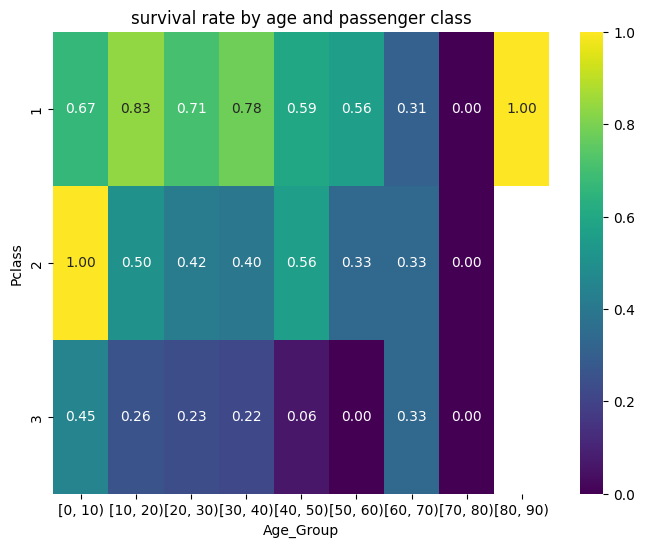

In [20]:
# Activity 4: Visualizing Survival Rate by Age and Passenger Class
# Create a visualization (e.g., a heatmap) showing the survival rate for different age groups (as in Activity 2) and passenger classes.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
survival_heatmap=titanic_df.pivot_table(index='Pclass' , columns='Age_Group', values='Survived' , aggfunc='mean')
plt.figure(figsize=(8,6))
sns.heatmap(survival_heatmap, annot=True , cmap='viridis' , fmt='.2f')
plt.title('survival rate by age and passenger class')
plt.xlable='age_group'
plt.ylable='Pclass'
plt.show()

In [21]:
# Activity 5: Advanced Pivot Table Analysis: Survival Rate, Fare, and Age
# Construct a pivot table that simultaneously presents:
#   - The average survival rate
#   - The median fare
#   - The average age
# Grouped by 'Pclass' and 'Sex'.
# Handle potential missing values in the pivot table.

import pandas as pd

# Create the pivot table
advanced_pivot_table = pd.pivot_table(
    titanic_df,
    values=['Survived', 'Fare', 'Age'],  # Values to analyze
    index=['Pclass', 'Sex'],  # Grouping columns
    aggfunc={'Survived': 'mean', 'Fare': 'median', 'Age': 'mean'},  # Aggregation functions
    fill_value=titanic_df.mean(numeric_only=True)  # Fill missing values with column means
)

# Display the pivot table
print(advanced_pivot_table)

                     Age      Fare  Survived
Pclass Sex                                  
1      female  34.611765  82.66455  0.968085
       male    41.281386  41.26250  0.368852
2      female  28.722973  22.00000  0.921053
       male    30.740707  13.00000  0.157407
3      female  21.750000  12.47500  0.500000
       male    26.507589   7.92500  0.135447


In [22]:
file_path = "/content/Titanic-Dataset.csv"
titanic_df = pd.read_csv(file_path)

In [23]:
titanic_df.to_csv("Mohib_StudentAdmission_data.csv", index=False)